# Fuel consumption ratings

## Source
Datasets retried from the Government of Canada's open data portal [fuel consumption ratings page](https://open.canada.ca/data/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

## Objective

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [11]:
 # Check if file path is valid.
file_path = './datasets/my2024-fuel-consumption-ratings.csv'

if not os.path.isfile(file_path):
    fnf_err = f'{file_path} not found.'
    raise FileNotFoundError(fnf_err)

consumption_df = pd.read_csv(file_path, encoding='latin-1')

dataset_columns = consumption_df.columns.tolist()
print(f"This dataset contains the following columns {dataset_columns}")

num_rows, num_cols = consumption_df.shape
print(f"Data set shape {num_rows} rows x {num_cols} cols")

This dataset contains the following columns ['Model year', 'Make', 'Model', 'Vehicle class', 'Engine size (L)', 'Cylinders', 'Transmission', 'Fuel type', 'City (L/100 km)', 'Highway (L/100 km)', 'Combined (L/100 km)', 'Combined (mpg)', 'CO2 emissions (g/km)', 'CO2 rating', 'Smog rating']
Data set shape 768 rows x 15 cols


<Axes: xlabel='Make'>

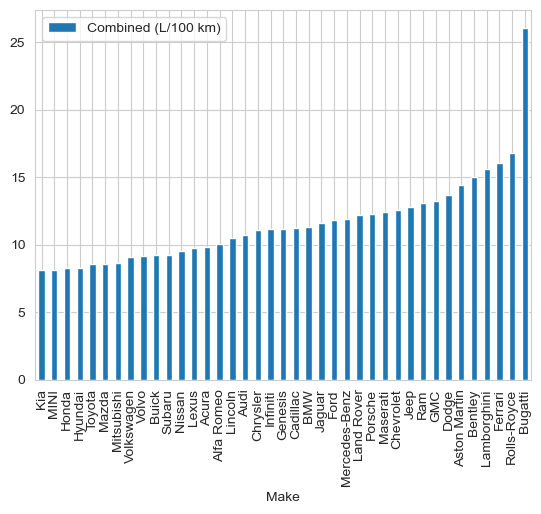

In [12]:
consumption_df[['Make', 'Combined (L/100 km)']].groupby('Make').mean().sort_values('Combined (L/100 km)').plot(kind='bar')

## Select a subset of vehicles for analysis.

Luxury performance brands such as Bugatti and Ferrari do not sell in large numbers. We can focus our analysis on more mainstream car brands which sell in larger numbers.

In [13]:
rejects = ['Bugatti', 'Rolls-Royce', 'Ferrari', 'Bentley', 'Lamborghini', 'Aston Martin', 'Maserati']
filtered_df = consumption_df.loc[~consumption_df['Make'].isin(rejects)]

retained_makes = filtered_df['Make'].unique()
print(retained_makes)

['Acura' 'Alfa Romeo' 'Audi' 'BMW' 'Buick' 'Cadillac' 'Chevrolet'
 'Chrysler' 'Dodge' 'Ford' 'Genesis' 'GMC' 'Honda' 'Hyundai' 'Infiniti'
 'Jaguar' 'Jeep' 'Kia' 'Land Rover' 'Lexus' 'Lincoln' 'Mazda'
 'Mercedes-Benz' 'MINI' 'Mitsubishi' 'Nissan' 'Porsche' 'Ram' 'Subaru'
 'Toyota' 'Volkswagen' 'Volvo']


In [14]:
filtered_df = filtered_df[['Make', 'Combined (L/100 km)']]
ordered = filtered_df.groupby('Make').median().sort_values('Combined (L/100 km)', ascending=False).index

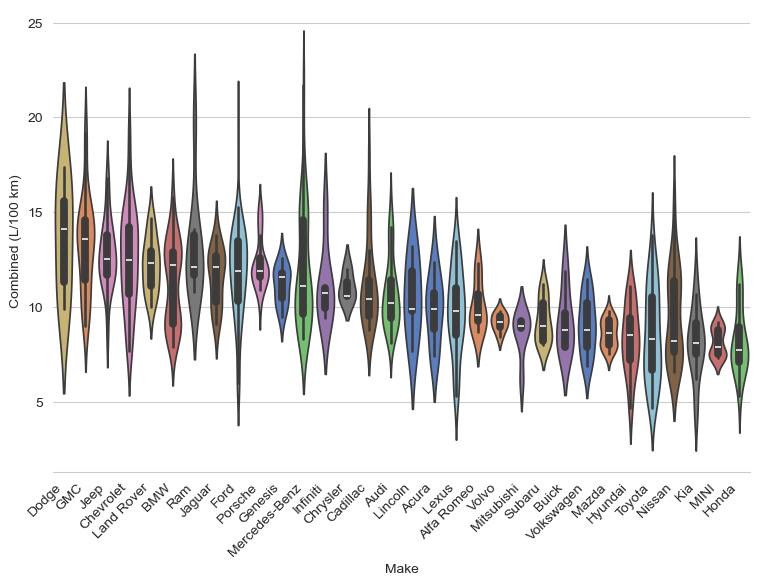

In [15]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(9, 6))
sns.violinplot(x='Make', y='Combined (L/100 km)', data=filtered_df, order=ordered, palette='muted', hue='Make',density_norm='width', saturation=0.75)

_ = plt.xticks(rotation=45, ha='right')
sns.despine(left=True)

## Focusing on most common brands
The most common brands in Metro Vancouver for gasoline and hybrids are probably Honda, Toyota, Kia and Hyundai. 
In future work, we can analyze ICBC datasets to find out which are the most common brands in the Lower Mainland.

In [16]:
selected_makes = ['Toyota', 'Honda', 'Kia','Hyundai', 'Mazda', 'Nissan']
selected_df = consumption_df.loc[consumption_df['Make'].isin(selected_makes)]
num_rows, num_cols = selected_df.shape
print(f"Data set shape {num_rows} rows x {num_cols} cols")

Data set shape 158 rows x 15 cols


## Looking at fuel consumptions and carbon dioxide emissions